In [73]:
# Import Packages
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import numpy as np


In [74]:
# Class to represent a cone
class Cone:
    def __init__(self, center, radius, starting_angle, end_angle):
        self.center = center  # center is a tuple (x, y)
        self.radius = radius  # radius is a float
        self.starting_angle = starting_angle  # starting angle is a float in degrees
        self.end_angle = end_angle  # end angle is a float in degrees

    def getCenter(self):
        return self.center

    def getRadius(self):
        return self.radius

    def getStartingAngle(self):
        return self.starting_angle

    def getEndAngle(self):
        return self.end_angle

    def rotate(self, angle):
        self.starting_angle += angle
        self.end_angle += angle
        self.starting_angle = self.starting_angle % 360
        self.end_angle = self.end_angle % 360

    def setCenter(self, center):
        self.center = center

    def Draw_Cone(self, ax, my_color, start_angle, end_angle):
        wedge = patches.Wedge(
            self.center, self.radius, start_angle, end_angle, color=my_color, alpha=0.5
        )
        ax.add_patch(wedge)  # add the wedge to the plot

In [75]:
# Function
'''
description : Function to determine if the center of cone_1 is in cone_2
param        [*] cone_1
param        [*] cone_2
return       [*] True if cone_1 is in cone_2, False otherwise
'''


def In_Cone(cone_1, cone_2):
    # Convert the center of cone_1 to polar coordinates with cone_2 as the origin
    x = cone_1.getCenter()[0] - cone_2.getCenter()[0]
    y = cone_1.getCenter()[1] - cone_2.getCenter()[1]
    r = math.sqrt(x**2 + y**2)
    theta = math.degrees(math.atan2(y, x))
    if theta < 0:
        theta += 360

    # Check if the center of cone_1 is in cone_2
    if (
        r <= cone_2.getRadius()
        and theta >= cone_2.getStartingAngle()
        and theta <= cone_2.getEndAngle()
    ):
        return True
    else:
        return False


'''
description : Function to save the signal of the sensors
param        [*] View_1
param        [*] View_2
return       [*]
'''


def Save_View(View_1, View_2):
    View_1 = np.array(View_1)
    View_2 = np.array(View_2)
    np.save('View_1', View_1)
    np.save('View_2', View_2)


'''
description : Function to save the log of the cones
param        [*] Log_1
param        [*] Log_2
return       [*]
'''


def Save_Log(Log_1, Log_2):
    Log_1 = np.array(Log_1)
    Log_2 = np.array(Log_2)
    np.save('Log_1', Log_1)
    np.save('Log_2', Log_2)

In [76]:
# Parameters
Distance = 2  # Distance between the two sensors
Radius = 3  # Height of the cone
Starting_Angle_1 = 0  # Starting angle of the first sensor
Starting_Angle_2 = 180  # Starting angle of the second sensor
Angle = 45  # Angle of the sensor
End_Angle_1 = Starting_Angle_1 + Angle  # Ending angle of the first sensor
End_Angle_2 = Starting_Angle_2 + Angle  # Ending angle of the second sensor
Speed_1 = 13  # Speed of the first sensor in degrees per frame
Speed_2 = 13  # Speed of the second sensor in degrees per frame

# Data Record
View_1 = []  # Record the view of the first sensor
View_2 = []  # Record the view of the second sensor
Log_1 = []  # Log of the degree of first sensor
Log_2 = []  # Log of the degree of second sensor

# Animation Parameters
Frame_Number = 400
Frame_Interval = 40  # in milliseconds

In [77]:
# Create two cones
cone_1 = Cone([0, 0], Radius, Starting_Angle_1, End_Angle_1)
cone_2 = Cone([0, Distance], Radius, Starting_Angle_2, End_Angle_2)


In [78]:
# Simulation
for i in range(Frame_Number):
    cone_1.rotate(Speed_1)
    cone_2.rotate(Speed_2)

    # Determine if cone_1 is in cone_2
    one_in_two = In_Cone(cone_1, cone_2)
    two_in_one = In_Cone(cone_2, cone_1)
    Log_1.append([cone_1.getStartingAngle(), cone_1.getEndAngle()])
    Log_2.append([cone_2.getStartingAngle(), cone_2.getEndAngle()])

    # Draw the cones
    if two_in_one and one_in_two:
        View_1.append(3)
        View_2.append(1)
    else:
        View_1.append(2)
        View_2.append(0)

# Save the data
# Save_View(View_1, View_2)
# Save_Log(Log_1, Log_2)

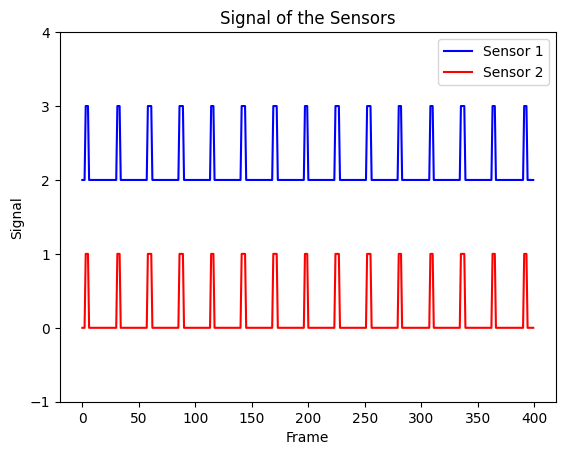

In [79]:
# Plot the signal of the sensors
fig, ax = plt.subplots()
ax.plot(View_1, 'b', label='Sensor 1')
ax.plot(View_2, 'r', label='Sensor 2')
ax.set_ylim([-1, 4])
ax.set_xlabel('Frame')
ax.set_ylabel('Signal')
ax.set_title('Signal of the Sensors')
ax.legend()
plt.savefig('Data-' + str(Distance) + '.png')
plt.show()

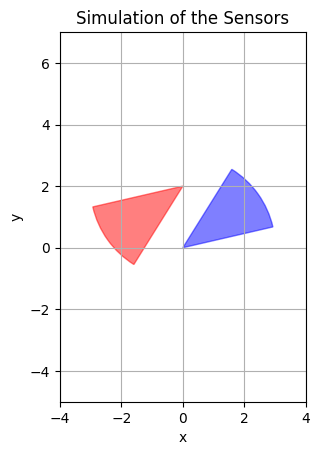

In [80]:
# Create the animation
fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    plt.xlim([-4, 4])
    plt.ylim([-5, 7])
    plt.title('Simulation of the Sensors')
    plt.xlabel('x')
    plt.ylabel('y')
    if View_1[t] == 3:
        cone_1.Draw_Cone(ax, 'g', Log_1[t][0], Log_1[t][1])
    else:
        cone_1.Draw_Cone(ax, 'b', Log_1[t][0], Log_1[t][1])
    if View_2[t] == 1:
        cone_2.Draw_Cone(ax, 'g', Log_2[t][0], Log_2[t][1])
    else:
        cone_2.Draw_Cone(ax, 'r', Log_2[t][0], Log_2[t][1])
    # Set the scale of the axis
    ax.set_aspect('equal', adjustable='box')
    ax.grid()


frame = np.arange(0, Frame_Number, 1)
anim = FuncAnimation(
    fig, animate, frames=frame, interval=Frame_Interval
)  # interval increased for slower animation

# Save the animation as a mp4 file
anim.save('animation-' + str(Distance) + '.mp4', writer='ffmpeg')